# Download CMIP6 zarr data from AWS 

### Description
- This is a very simple example that demonstrates how to download the same zarr object from AWS using s3 and OSDF protocols, respectively
- This notebook does not use intake catalogs to get the data or dask to scale up the job

In [9]:
from matplotlib import pyplot as plt
import xarray as xr
import fsspec
import pandas as pd
import s3fs

In [2]:
import fsspec.implementations.http as fshttp
from pelicanfs.core import OSDFFileSystem,PelicanMap 

In [3]:
# Connect to AWS S3 storage
fs = s3fs.S3FileSystem(anon=True)

# create a MutableMapping from a store URL
mapper = fs.get_mapper("s3://cmip6-pds/CMIP6/CMIP/AS-RCEC/TaiESM1/1pctCO2/r1i1p1f1/Amon/tas/gn/v20200225/")

# make sure to specify that metadata is consolidated
ds_s3 = xr.open_zarr(mapper, consolidated=True)
ds_s3

/Users/harshah/venvs/osdf/lib/python3.12/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: Engine 'gini' loading failed:
expected bytes, str found
  external_backend_entrypoints = backends_dict_from_pkg(entrypoints_unique)


<xarray.Dataset> Size: 398MB
Dimensions:    (lat: 192, bnds: 2, lon: 288, time: 1800)
Coordinates:
    height     float64 8B ...
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 14kB 0001-01-16 12:00:00 ... 0150-12-16 12:00:00
    time_bnds  (time, bnds) object 29kB dask.array<chunksize=(1800, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 398MB dask.array<chunksize=(409, 192, 288), meta=np.ndarray>
Attributes: (12/53)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0701-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     182500.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    tracking_id:               hdl:21.14100/77d09dec-965e-4f24-b113-f3945bf411ab
    variable_id:               tas
    variant_label:             r1i1p1f1
    netcdf_tracking_ids:       hdl:21.14100/77d09dec-965e-4f24-b113-f3945bf411ab
    version_id:                v20200225

In [4]:
%%time
ds_osdf = xr.open_zarr('osdf:///aws-opendata/us-west-2/cmip6-pds/CMIP6/CMIP/AS-RCEC/TaiESM1/1pctCO2/r1i1p1f1/Amon/tas/gn/v20200225/')
ds_osdf

CPU times: user 64.5 ms, sys: 7.41 ms, total: 71.9 ms
Wall time: 899 ms


<xarray.Dataset> Size: 398MB
Dimensions:    (lat: 192, bnds: 2, lon: 288, time: 1800)
Coordinates:
    height     float64 8B ...
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 14kB 0001-01-16 12:00:00 ... 0150-12-16 12:00:00
    time_bnds  (time, bnds) object 29kB dask.array<chunksize=(1800, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 398MB dask.array<chunksize=(409, 192, 288), meta=np.ndarray>
Attributes: (12/53)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0701-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     182500.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    tracking_id:               hdl:21.14100/77d09dec-965e-4f24-b113-f3945bf411ab
    variable_id:               tas
    variant_label:             r1i1p1f1
    netcdf_tracking_ids:       hdl:21.14100/77d09dec-965e-4f24-b113-f3945bf411ab
    version_id:                v20200225

In [5]:
# test = xr.open_zarr('s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/highresSST-present/r1i1p1f1/Amon/ta/gn/v20170706/,,20170706',anon=True)

In [6]:
%%time
surface_air_temps = ds_osdf['tas']
surface_air_temps

CPU times: user 34 μs, sys: 0 ns, total: 34 μs
Wall time: 35.8 μs


<xarray.DataArray 'tas' (time: 1800, lat: 192, lon: 288)> Size: 398MB
dask.array<open_dataset-tas, shape=(1800, 192, 288), dtype=float32, chunksize=(409, 192, 288), chunktype=numpy.ndarray>
Coordinates:
    height   float64 8B ...
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 14kB 0001-01-16 12:00:00 ... 0150-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    history:        2020-01-17T03:35:58Z altered by CMOR: Treated scalar dime...
    long_name:      Near-Surface Air Temperature
    original_name:  TREFHT
    standard_name:  air_temperature
    units:          K

### Plot the first time step

CPU times: user 784 ms, sys: 369 ms, total: 1.15 s
Wall time: 2.4 s


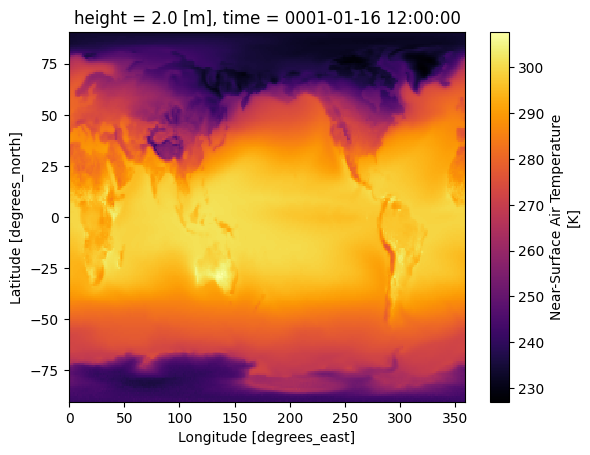

In [7]:
%%time
surface_air_temps.isel(time=0).plot(cmap='inferno')

In [23]:
df        = pd.read_csv("https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.csv")
df_subset = df.query("activity_id=='CMIP' & table_id=='Amon' & variable_id=='tas'")
#
# Replace 'tas' with 'tasmax' or 'tasmin' if you need `new' data that has not already been loaded to a cache
df_subset

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
788,CMIP,CNRM-CERFACS,CNRM-CM6-1,1pctCO2,r1i1p1f2,Amon,tas,gr,s3://cmip6-pds/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM...,NaN,20180626
1879,CMIP,NOAA-GFDL,GFDL-CM4,1pctCO2,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/1...,NaN,20180701
2440,CMIP,NOAA-GFDL,GFDL-CM4,abrupt-4xCO2,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/a...,NaN,20180701
5560,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/p...,NaN,20180701
6360,CMIP,NOAA-GFDL,GFDL-ESM4,1pctCO2,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20180701
...,...,...,...,...,...,...,...,...,...,...,...
521907,CMIP,MRI,MRI-ESM2-0,historical,r6i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/MRI/MRI-ESM2-0/histo...,NaN,20210907
522184,CMIP,MOHC,HadGEM3-GC31-LL,piControl,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL...,NaN,20211103
522188,CMIP,CMCC,CMCC-CM2-SR5,historical,r3i1p2f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/hi...,NaN,20211108
522198,CMIP,CMCC,CMCC-CM2-SR5,historical,r2i1p2f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/hi...,NaN,20211109


## Download multiple files

Change ztore/object paths to use osdf protocol!

In [30]:
object_paths = df_subset['zstore'].str.replace('s3://','osdf:///aws-opendata/us-west-2/',regex=False).to_list()
object_paths[:5]

['osdf:///aws-opendata/us-west-2/cmip6-pds/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/1pctCO2/r1i1p1f2/Amon/tas/gr/v20180626/',
 'osdf:///aws-opendata/us-west-2/cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/1pctCO2/r1i1p1f1/Amon/tas/gr1/v20180701/',
 'osdf:///aws-opendata/us-west-2/cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/abrupt-4xCO2/r1i1p1f1/Amon/tas/gr1/v20180701/',
 'osdf:///aws-opendata/us-west-2/cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/piControl/r1i1p1f1/Amon/tas/gr1/v20180701/',
 'osdf:///aws-opendata/us-west-2/cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/1pctCO2/r1i1p1f1/Amon/tas/gr1/v20180701/']

In [25]:
len(object_paths)

1160

In [26]:
# Max number of objects to downloaded
n_max  = 2

In [28]:
%%time
for i in range(n_max):
    ds = xr.open_zarr(object_paths[i])
    #
    tas = ds['tas']
    
    #Explicitly load tas/ (Temperature, Air Surface) data
    tas_copy = tas
    tas_copy.compute()
    print(f' Loaded data from {i}_th zarr store')

 Loaded data from 0_th zarr store
 Loaded data from 1_th zarr store
CPU times: user 7.76 s, sys: 3.24 s, total: 11 s
Wall time: 31.7 s
